## Logistic Regression
Logistic Regression is a classification algorithm used for binary and multi-class classification problems. 
It predicts the probability that a given input belongs to a particular class.

### Why is it called Regression if it's a Classification Algorithm?
The name "Logistic Regression" comes from its foundation in regression techniques. Unlike linear regression, which predicts continuous values, logistic regression applies the **sigmoid function** to the linear model, converting it into a probability output. Despite being used for classification, it is still called "regression" because it models the relationship between independent variables and the probability of a particular outcome.


## 2. Mathematical Formulation

### Sigmoid Function:
Logistic regression is based on the sigmoid function:

σ(z) = 1 / (1 + e^(-z))

where z = wX + b (linear model)

The probability of a sample belonging to class 1 is given by:
P(Y=1|X) = σ(wX + b)

Decision rule:
- If P(Y=1|X) ≥ 0.5, predict class 1
- If P(Y=1|X) < 0.5, predict class 0

## 3. Logistic Regression in Scikit-Learn


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# generate synthetic dataset
from sklearn.datasets import make_classification

#make_classification generates a synthetic dataset with given parameters
#n_samples: no. of data points
#n_features: no. of input features
#random_state: ensures reproducibility

data,labels = make_classification(n_samples=1000, n_features=5, random_state=42)


In [25]:
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Label'] = labels

In [26]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label
0,-0.439643,0.542547,-0.822420,0.401366,-0.854840,0
1,2.822231,-2.480859,-1.147691,-2.101131,3.040278,1
2,1.618386,-1.369478,-2.084113,-1.179659,1.613602,1
3,1.659048,-0.615202,1.112688,-0.835098,-0.272205,1
4,1.849824,-1.679456,-0.926698,-1.402509,2.123129,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [31]:
#Standardizing the data
"""
Standardization is essential for logistic regression because it ensures that all features contribute equally to the model. 
Since features may have different scales, standardization transforms them to have a mean of 0 and a standard deviation of 1. 
This helps in faster convergence and prevents dominance of features with larger scales over smaller ones.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#Creating and training logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

In [47]:
#evaluating the mode

print("Accuracy: ", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)


Accuracy:  0.89


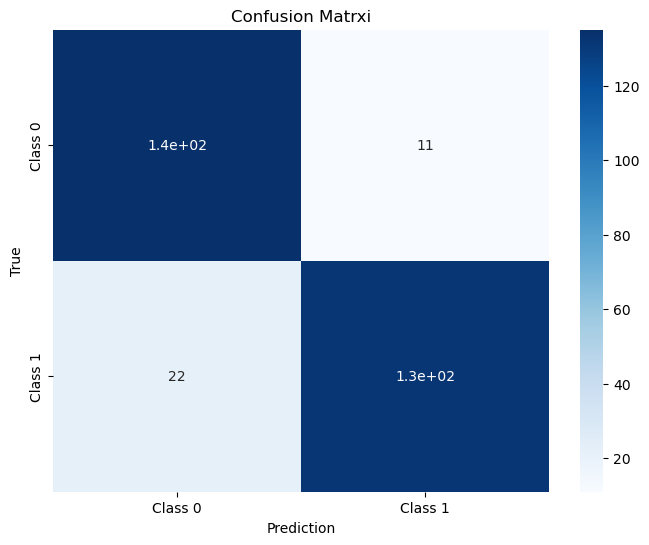

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Prediction")
plt.ylabel("True")
plt.title("Confusion Matrxi")
plt.show()

## 4. Understanding the Formula Used by Scikit-Learn

Scikit-learn uses the logistic function:

P(Y=1|X) = 1 / (1 + exp(-(wX + b)))

To find the optimal parameters (w, b), sklearn minimizes the log-loss function:

Loss = - (1/n) * Σ [ y*log(p) + (1-y)*log(1-p) ]

where p = P(Y=1|X).

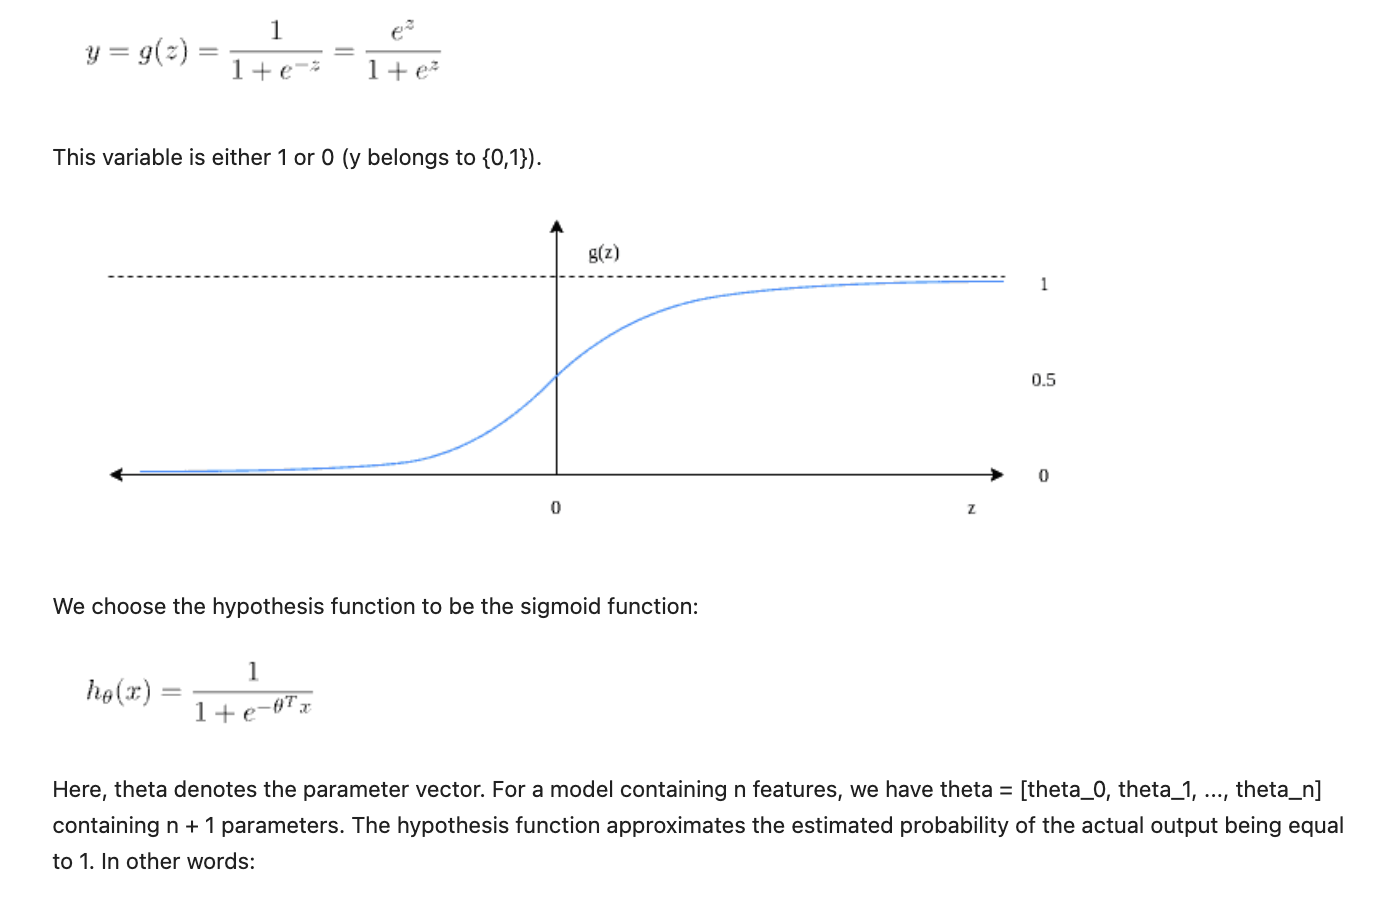
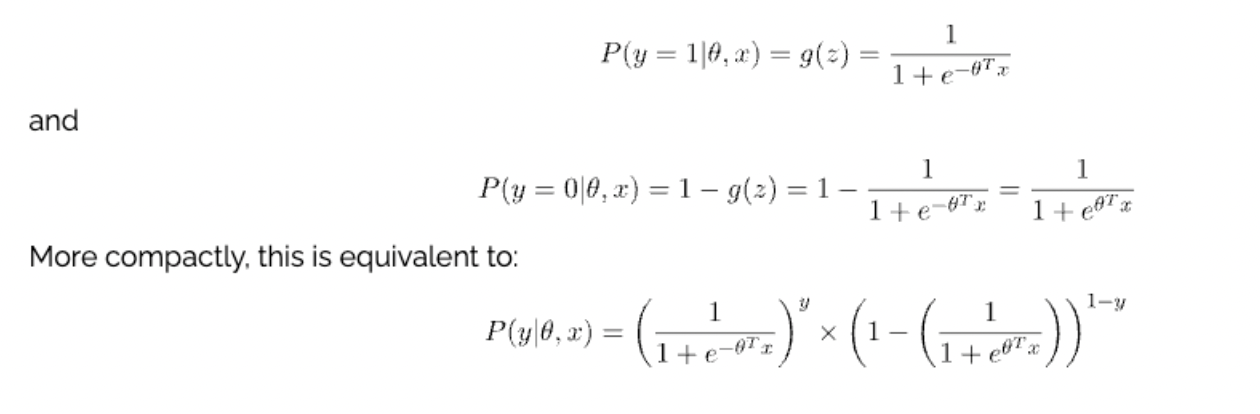

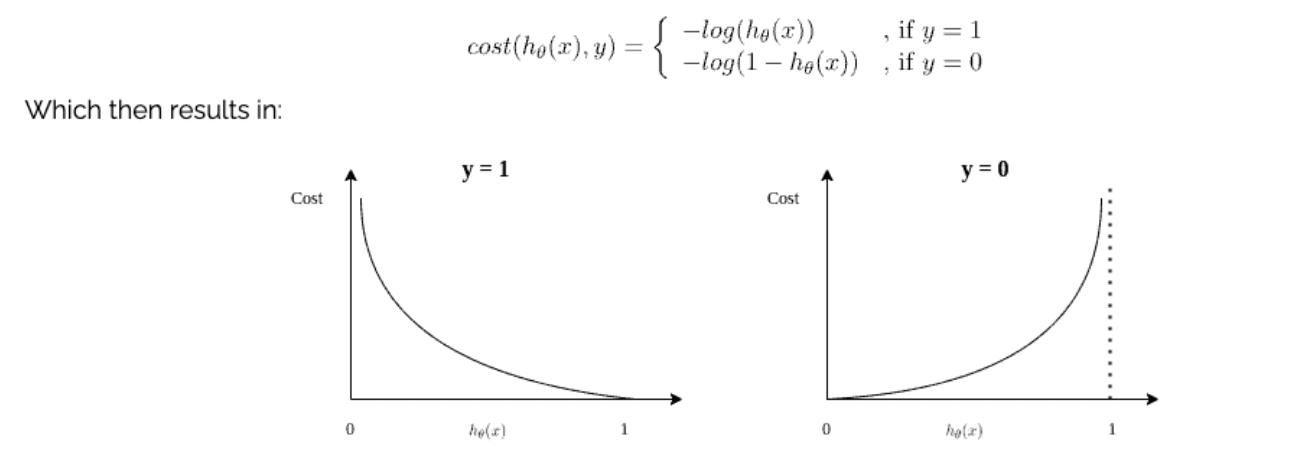

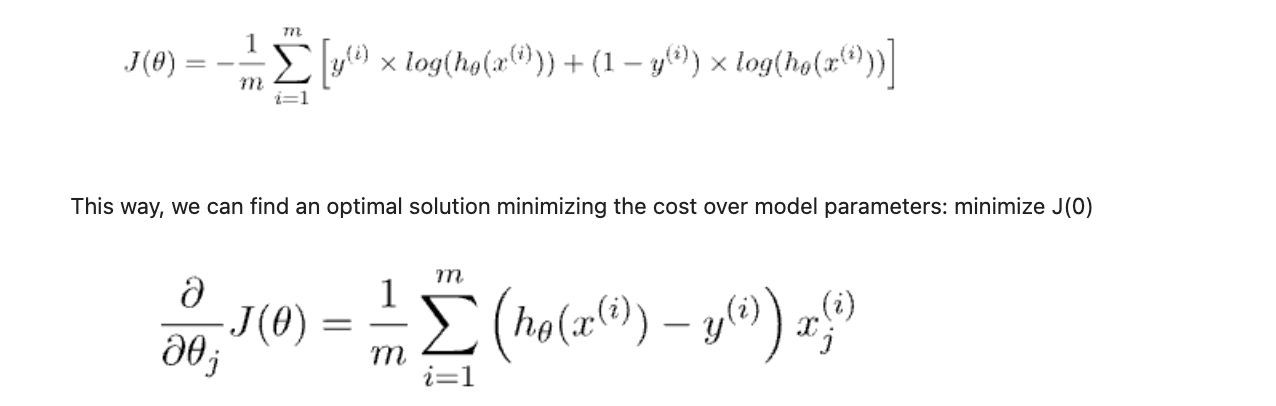

## 5. Hyperparameters of Logistic Regression

- `penalty`: Type of regularization ("l1", "l2", "elasticnet", or "none")
- `C`: Inverse of regularization strength (smaller values = stronger regularization)
- `solver`: Optimization algorithm ("lbfgs", "liblinear", "saga", etc.)
- `max_iter`: Maximum number of iterations for convergence


## 6. Advanced Logistic Regression: Regularization and Feature Importance

In [54]:
#Regularized logistic regression
model_reg = LogisticRegression(penalty="l2", C=0.4, solver="lbfgs")
model_reg.fit(X_train, y_train)
print("Accuracy with Regulaization: ", accuracy_score(y_test, model_reg.predict(X_test)))

Accuracy with Regulaization:  0.8866666666666667


## 7. Prediction on test data

In [56]:
test_pred = model.predict(X_test)
print("Prediction on test data: ", test_pred[:10]) # for first 10 prediction

Prediction on test data:  [1 0 1 1 0 0 1 0 0 1]


## 8. Inference for Example Feature


In [58]:
# Example feature input for inference
example_features = np.array([[0.5, -1.2, 2.3, 0.8, -0.5]])
example_features_scaled = scaler.transform(example_features)

In [60]:
#missing prediction
inference_prediction = model.predict(example_features_scaled)
print("Inference prediction:", inference_prediction)

Inference prediction: [1]


## 🧠 Model Persistence

Model persistence refers to saving a trained machine learning model to disk so that it can be reused later without retraining. This is especially useful for deployment, sharing models, and improving performance in production environments.

### ✅ Why Use Model Persistence?

- **Avoid Retraining**: Save time by loading pre-trained models.
- **Deployment Ready**: Use the model in web apps or APIs.
- **Reproducibility**: Ensure consistent results when sharing or testing.
- **Batch Predictions**: Apply saved models to new data in scheduled jobs.

### 🛠️ Common Methods

| Tool     | Format     | Use Case                              |
|----------|------------|----------------------------------------|
| `joblib` | `.joblib`  | Best for scikit-learn models           |
| `pickle` | `.pkl`     | General-purpose Python object saving   |
| Keras/TensorFlow | `.h5` or `.pb` | For deep learning models        |
| ONNX     | `.onnx`    | Framework-agnostic model portability   |
